# Reduction sum test timing

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [29]:
# timing output for various block sizes
output_512 = """[1000000000] [SUCCESS] Computed in: CPU: 4749773 us, GPU: 1852593 us, CPU/GPU ratio: 2.563851
[500000000] [SUCCESS] Computed in: CPU: 2355026 us, GPU: 884967 us, CPU/GPU ratio: 2.661146
[250000000] [SUCCESS] Computed in: CPU: 1188654 us, GPU: 435624 us, CPU/GPU ratio: 2.728624
[125000000] [SUCCESS] Computed in: CPU: 589036 us, GPU: 216697 us, CPU/GPU ratio: 2.718247
[62500000] [SUCCESS] Computed in: CPU: 302744 us, GPU: 117614 us, CPU/GPU ratio: 2.574047
[31250000] [SUCCESS] Computed in: CPU: 150438 us, GPU: 55809 us, CPU/GPU ratio: 2.695587
[15625000] [SUCCESS] Computed in: CPU: 72961 us, GPU: 29183 us, CPU/GPU ratio: 2.500120
[7812500] [SUCCESS] Computed in: CPU: 37256 us, GPU: 15579 us, CPU/GPU ratio: 2.391424
[3906250] [SUCCESS] Computed in: CPU: 18341 us, GPU: 8089 us, CPU/GPU ratio: 2.267400
[1953125] [SUCCESS] Computed in: CPU: 9193 us, GPU: 4458 us, CPU/GPU ratio: 2.062135
[976562] [SUCCESS] Computed in: CPU: 4664 us, GPU: 2257 us, CPU/GPU ratio: 2.066460
[488281] [SUCCESS] Computed in: CPU: 2335 us, GPU: 1153 us, CPU/GPU ratio: 2.025152
[244140] [SUCCESS] Computed in: CPU: 1170 us, GPU: 774 us, CPU/GPU ratio: 1.511628
[122070] [SUCCESS] Computed in: CPU: 617 us, GPU: 609 us, CPU/GPU ratio: 1.013136
[61035] [SUCCESS] Computed in: CPU: 318 us, GPU: 519 us, CPU/GPU ratio: 0.612717
[30517] [SUCCESS] Computed in: CPU: 170 us, GPU: 467 us, CPU/GPU ratio: 0.364026
[15258] [SUCCESS] Computed in: CPU: 81 us, GPU: 434 us, CPU/GPU ratio: 0.186636
[7629] [SUCCESS] Computed in: CPU: 38 us, GPU: 436 us, CPU/GPU ratio: 0.087156
[3814] [SUCCESS] Computed in: CPU: 19 us, GPU: 424 us, CPU/GPU ratio: 0.044811
[1907] [SUCCESS] Computed in: CPU: 9 us, GPU: 450 us, CPU/GPU ratio: 0.020000
[953] [SUCCESS] Computed in: CPU: 5 us, GPU: 430 us, CPU/GPU ratio: 0.011628
[476] [SUCCESS] Computed in: CPU: 5 us, GPU: 419 us, CPU/GPU ratio: 0.011933
[238] [SUCCESS] Computed in: CPU: 5 us, GPU: 426 us, CPU/GPU ratio: 0.011737
[119] [SUCCESS] Computed in: CPU: 4 us, GPU: 237 us, CPU/GPU ratio: 0.016878
[59] [SUCCESS] Computed in: CPU: 5 us, GPU: 219 us, CPU/GPU ratio: 0.022831
[29] [SUCCESS] Computed in: CPU: 5 us, GPU: 227 us, CPU/GPU ratio: 0.022026
[14] [SUCCESS] Computed in: CPU: 5 us, GPU: 217 us, CPU/GPU ratio: 0.023041
[7] [SUCCESS] Computed in: CPU: 5 us, GPU: 224 us, CPU/GPU ratio: 0.022321
[3] [SUCCESS] Computed in: CPU: 5 us, GPU: 226 us, CPU/GPU ratio: 0.022124
[1] [SUCCESS] Computed in: CPU: 5 us, GPU: 217 us, CPU/GPU ratio: 0.023041"""

output_1024 = """[1000000000] [SUCCESS] Computed in: CPU: 4739400 us, GPU: 1811249 us, CPU/GPU ratio: 2.616647
[500000000] [SUCCESS] Computed in: CPU: 2390244 us, GPU: 897592 us, CPU/GPU ratio: 2.662952
[250000000] [SUCCESS] Computed in: CPU: 1190555 us, GPU: 448686 us, CPU/GPU ratio: 2.653426
[125000000] [SUCCESS] Computed in: CPU: 590677 us, GPU: 225170 us, CPU/GPU ratio: 2.623249
[62500000] [SUCCESS] Computed in: CPU: 292085 us, GPU: 114146 us, CPU/GPU ratio: 2.558872
[31250000] [SUCCESS] Computed in: CPU: 148188 us, GPU: 57747 us, CPU/GPU ratio: 2.566159
[15625000] [SUCCESS] Computed in: CPU: 73618 us, GPU: 30378 us, CPU/GPU ratio: 2.423399
[7812500] [SUCCESS] Computed in: CPU: 37091 us, GPU: 15953 us, CPU/GPU ratio: 2.325017
[3906250] [SUCCESS] Computed in: CPU: 18517 us, GPU: 8211 us, CPU/GPU ratio: 2.255146
[1953125] [SUCCESS] Computed in: CPU: 9492 us, GPU: 4630 us, CPU/GPU ratio: 2.050108
[976562] [SUCCESS] Computed in: CPU: 4725 us, GPU: 2357 us, CPU/GPU ratio: 2.004667
[488281] [SUCCESS] Computed in: CPU: 2373 us, GPU: 1817 us, CPU/GPU ratio: 1.305999
[244140] [SUCCESS] Computed in: CPU: 1226 us, GPU: 851 us, CPU/GPU ratio: 1.440658
[122070] [SUCCESS] Computed in: CPU: 597 us, GPU: 641 us, CPU/GPU ratio: 0.931357
[61035] [SUCCESS] Computed in: CPU: 297 us, GPU: 531 us, CPU/GPU ratio: 0.559322
[30517] [SUCCESS] Computed in: CPU: 148 us, GPU: 479 us, CPU/GPU ratio: 0.308977
[15258] [SUCCESS] Computed in: CPU: 77 us, GPU: 451 us, CPU/GPU ratio: 0.170732
[7629] [SUCCESS] Computed in: CPU: 55 us, GPU: 456 us, CPU/GPU ratio: 0.120614
[3814] [SUCCESS] Computed in: CPU: 34 us, GPU: 459 us, CPU/GPU ratio: 0.074074
[1907] [SUCCESS] Computed in: CPU: 18 us, GPU: 441 us, CPU/GPU ratio: 0.040816
[953] [SUCCESS] Computed in: CPU: 18 us, GPU: 450 us, CPU/GPU ratio: 0.040000
[476] [SUCCESS] Computed in: CPU: 10 us, GPU: 421 us, CPU/GPU ratio: 0.023753
[238] [SUCCESS] Computed in: CPU: 9 us, GPU: 431 us, CPU/GPU ratio: 0.020882
[119] [SUCCESS] Computed in: CPU: 10 us, GPU: 238 us, CPU/GPU ratio: 0.042017
[59] [SUCCESS] Computed in: CPU: 9 us, GPU: 235 us, CPU/GPU ratio: 0.038298
[29] [SUCCESS] Computed in: CPU: 10 us, GPU: 235 us, CPU/GPU ratio: 0.042553
[14] [SUCCESS] Computed in: CPU: 9 us, GPU: 234 us, CPU/GPU ratio: 0.038462
[7] [SUCCESS] Computed in: CPU: 9 us, GPU: 233 us, CPU/GPU ratio: 0.038627
[3] [SUCCESS] Computed in: CPU: 9 us, GPU: 233 us, CPU/GPU ratio: 0.038627
[1] [SUCCESS] Computed in: CPU: 10 us, GPU: 240 us, CPU/GPU ratio: 0.041667"""


In [76]:
# regex to read the data
pat = re.compile("\[(?P<size>\d+)\] \[.*\] Computed in: CPU: (?P<cpu>\d+) us, GPU: (?P<gpu>\d+) us, CPU/GPU ratio: (?P<ratio>\d+\.\d+)")




In [77]:
# extract data from string above
table_512 = pd.DataFrame(output_512.split("\n"))[0].str.extractall(pat).reset_index('match', drop=True)
table_1024 = pd.DataFrame(output_1024.split("\n"))[0].str.extractall(pat).reset_index('match', drop=True)

table_512['size'] = table_512['size'].astype(int)
table_512['cpu'] = table_512['cpu'].astype(int)
table_512['gpu'] = table_512['gpu'].astype(int)

table_1024['size'] = table_1024['size'].astype(int)
table_1024['cpu'] = table_1024['cpu'].astype(int)
table_1024['gpu'] = table_1024['gpu'].astype(int)

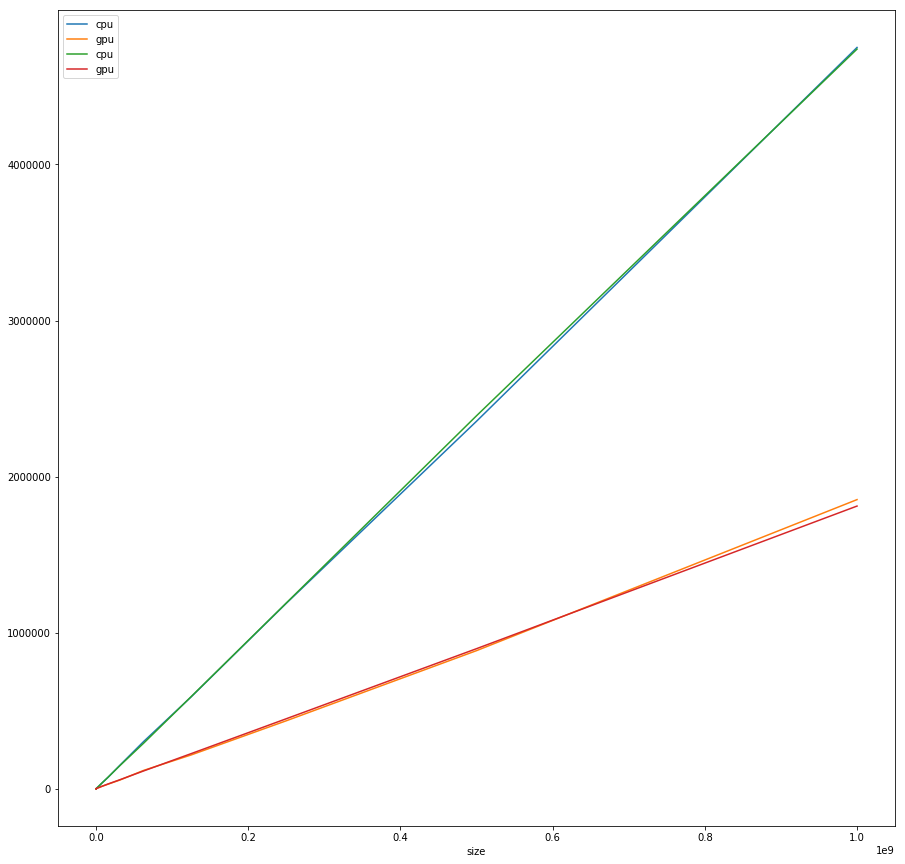

In [78]:
# plot data
ax = table_512.plot('size', 'cpu', figsize=(15,15))
table_512.plot('size', 'gpu', ax=ax)
table_1024.plot('size', 'cpu', ax=ax)
table_1024.plot('size', 'gpu', ax=ax)




Looks like both blocksizes give about the same speed

In [75]:
table_1024

,size,cpu,gpu,ratio
0,1000000000,4739400,1811249,2.616647
1,500000000,2390244,897592,2.662952
2,250000000,1190555,448686,2.653426
3,125000000,590677,225170,2.623249
4,62500000,292085,114146,2.558872
5,31250000,148188,57747,2.566159
6,15625000,73618,30378,2.423399
7,7812500,37091,15953,2.325017
8,3906250,18517,8211,2.255146
9,1953125,9492,4630,2.050108


In [79]:
table_1024['cpu_gpu_ratio'] = table_1024['cpu']/table_1024['gpu']

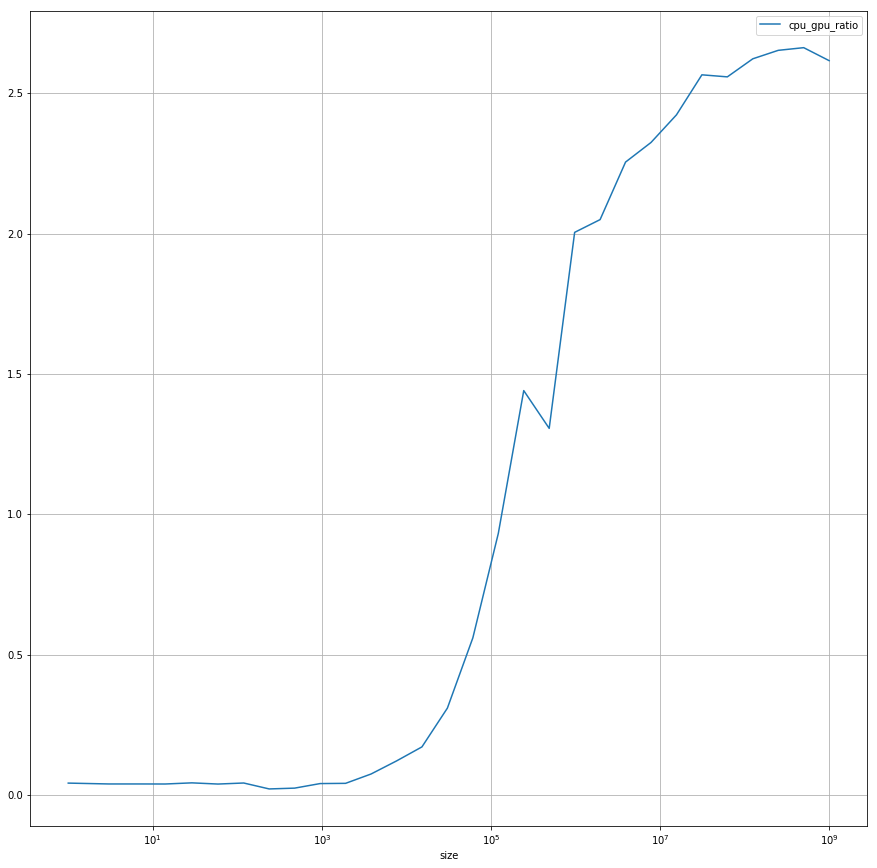

In [83]:
table_1024.plot('size', 'cpu_gpu_ratio', figsize=(15,15), logx=True, grid=True)

Looks like speedup comes above $10^5$ elements